<a href="https://colab.research.google.com/github/AeyshaAkterPurnia/CVPR/blob/main/Final/Assignment1__Digit_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all libraries

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model

In [19]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [20]:
os.environ['TFF_CPP_MIN_LOG_LEVEL']='2'
%matplotlib inline

In [21]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print()
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#5): Which is digit 2


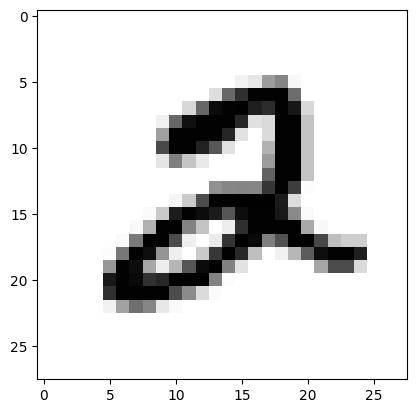

In [22]:
digit=5
a=x_train[digit]
plt.imshow(a,cmap='gray_r')
print(f"Image (#{digit}): Which is digit {y_train[digit]}")

Visual dataset

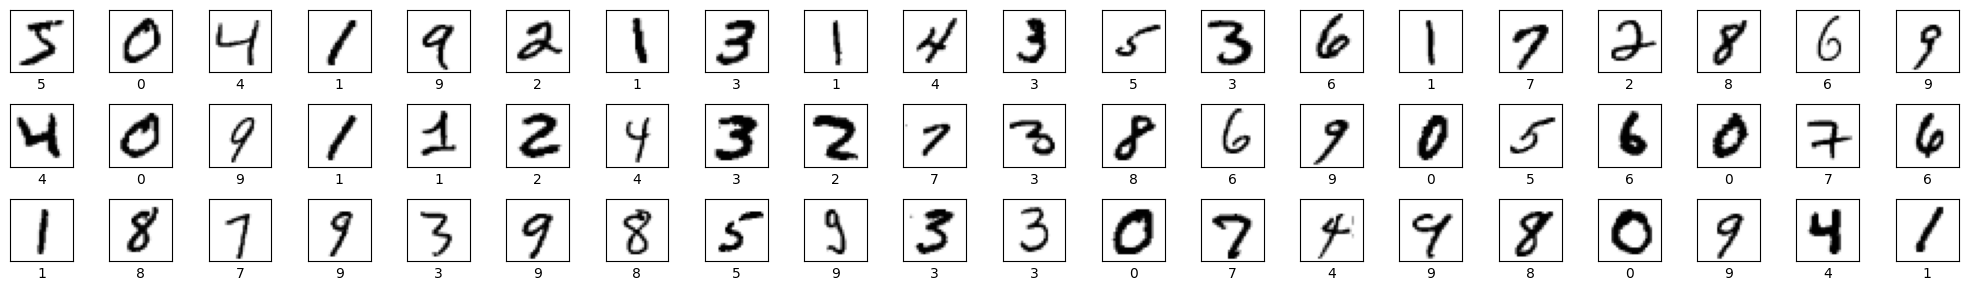

In [23]:
rows=3
cols=20
i=0

plt.figure(figsize=(20,3))
for r in range(rows):
  for c in range(cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(x_train[i],cmap=plt.cm.gray_r)

    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])
    i+=1
plt.tight_layout()
plt.show()

Normalise Data

In [24]:
x_train=x_train.reshape(-1,28*28).astype('float32')/255.0
x_test=x_test.reshape(-1,28*28).astype('float32')/255.0

Image (#5): Which is digit '2'


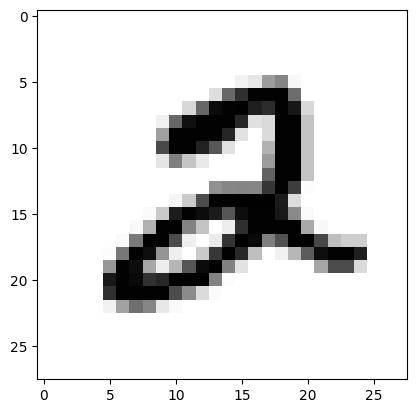

In [25]:
digit=5

a=x_train[digit].reshape(28,28)
plt.imshow(a,cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

Build the model

In [26]:
model=keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(units=256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(units=64,activation='relu'),
    layers.Dropout (0.5),
    layers.Dense(units=10,activation='softmax')
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model

In [27]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Train the model

In [28]:
h=model.fit(x=x_train,y=y_train,epochs=5,batch_size=64,validation_split=0.3)

Epoch 1/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5630 - loss: 1.2793 - val_accuracy: 0.9359 - val_loss: 0.2263
Epoch 2/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8949 - loss: 0.3894 - val_accuracy: 0.9504 - val_loss: 0.1744
Epoch 3/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9211 - loss: 0.2990 - val_accuracy: 0.9551 - val_loss: 0.1582
Epoch 4/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9327 - loss: 0.2500 - val_accuracy: 0.9598 - val_loss: 0.1485
Epoch 5/5
657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9420 - loss: 0.2240 - val_accuracy: 0.9639 - val_loss: 0.1262


Plot the model training result

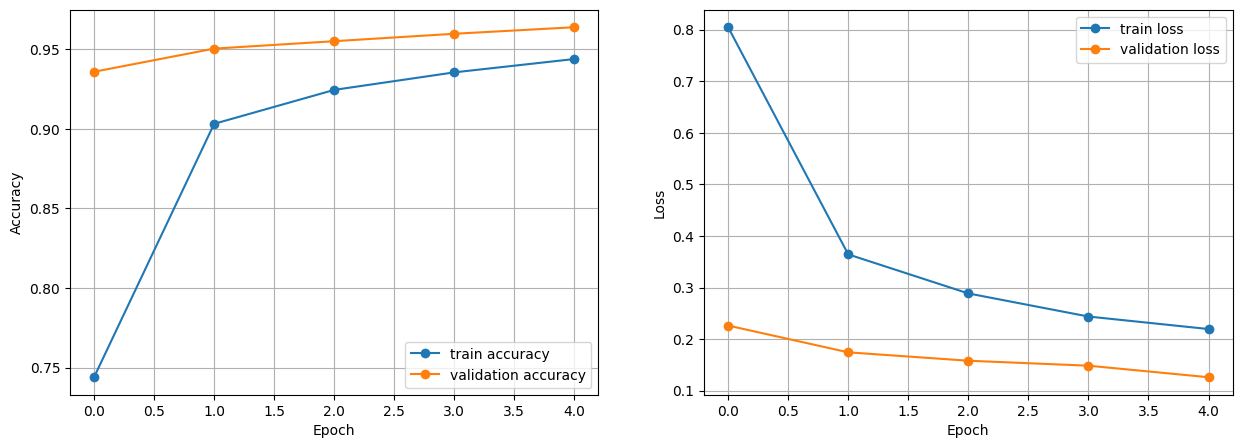

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'],'o-',label='train accuracy')
plt.plot(h.history['val_accuracy'],'o-',label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'],'o-',label='train loss')
plt.plot(h.history['val_loss'],'o-',label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Evaluate the model on the test dataset

In [30]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print('\nTest accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9639 - loss: 0.1327

Test accuracy: 0.9671000242233276


In [31]:
predictions=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


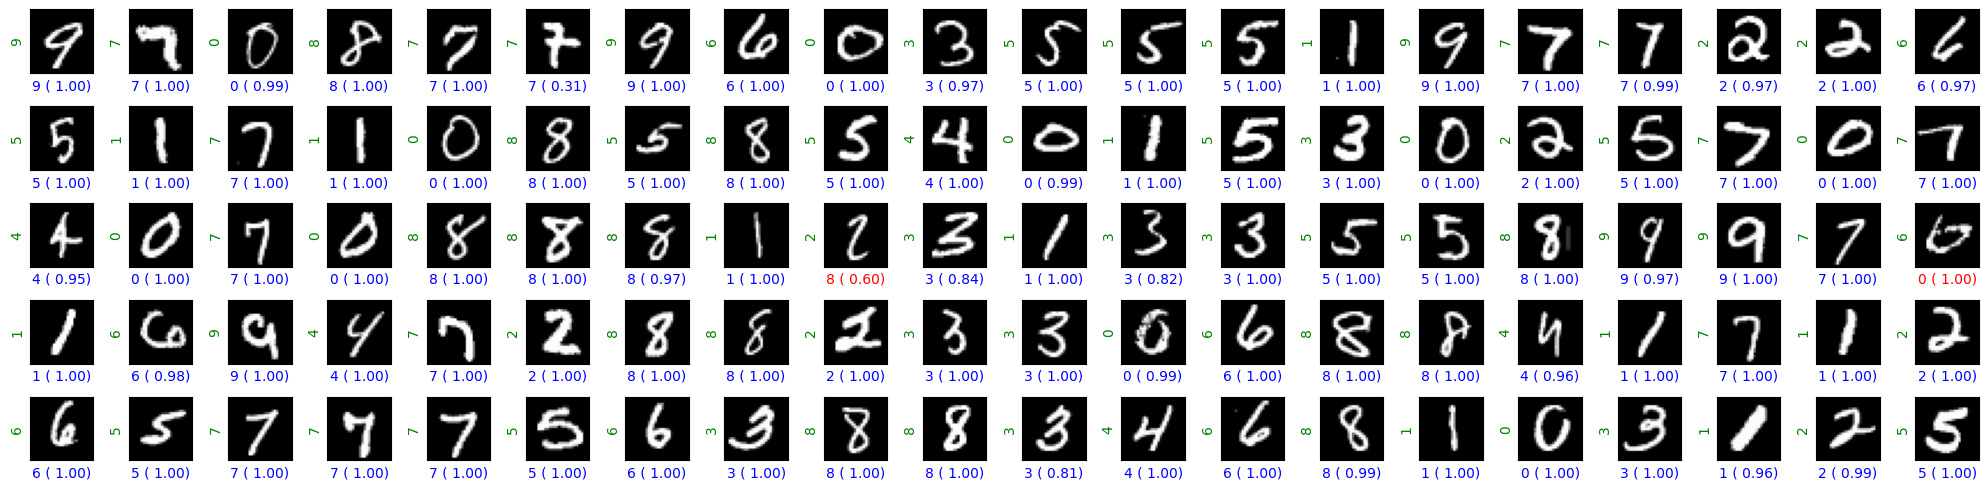

In [32]:
rows=5
cols=20

random_indices=random.sample(range(x_test.shape[0]),rows*cols)
sample_images=x_test[random_indices,:]
sample_labels=y_test[random_indices]
predictions=model.predict(sample_images)

i=0

plt.figure(figsize=(20,5))

for r in range(rows):
  for c in range(cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(sample_images[i].reshape(28,28),cmap=plt.cm.gray)
    plt.xticks([])
    plt.yticks([])
    prediction=np.argmax(predictions[i])
    confidence=predictions[i][prediction]
    if sample_labels[i]==prediction:
      plt.xlabel(f"{prediction} ({confidence: .2f})",color='b')
    else:
      plt.xlabel(f"{prediction} ({confidence: .2f})",color='r')
    plt.ylabel(sample_labels[i],color='g')
    i+=1
plt.tight_layout()
plt.show()

In [33]:
model.save("Assignment digit detection.h5")




In [34]:
from google.colab import files
files.download("Assignment digit detection.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>